<a href="https://colab.research.google.com/github/ciccmeek/Michael-Ciccarelli-FNCE-Python/blob/main/HW.5.Michael.efficientfrontier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Harry Markowitz founded the Modern Portfolio Theory (MPT), in which the most fundamental aspect is to **maximize** **returns** while **minimizing risks**.


### MPT means that investors can increase their returns, while minimizing or having no additional risk, by investing in different asset classes instead of just one.

### Having a combination of securities that lack correlation with each other, allows investors to increase or optimize their returns without increasing the risk of their portfolio.

### Encourages **diversification**.

### also known as **mean-variance analysis**.

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
plt.style.use('fivethirtyeight')
import datetime

## The goal is to plot the **Efficient Frontier**:

Efficient frontier is a graph with ‘returns’ on the Y-axis and ‘volatility’ on the X-axis. It shows the set of optimal portfolios that offer the **highest** **expected return **for a given risk level or the **lowest risk** for a given level of expected return.

### Let us start by getting tickers from Wikipedia:

In [ ]:
stockInfo = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
tickers_np = stockInfo['Symbol'].to_numpy()

In [ ]:
tickers_np

array(['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL',
       'A', 'APD', 'ABNB', 'AKAM', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT',
       'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AEP', 'AXP',
       'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS',
       'AON', 'APA', 'APO', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ADM', 'ANET',
       'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY',
       'AXON', 'BKR', 'BALL', 'BAC', 'BAX', 'BDX', 'BRK.B', 'BBY', 'TECH',
       'BIIB', 'BLK', 'BX', 'BK', 'BA', 'BKNG', 'BSX', 'BMY', 'AVGO',
       'BR', 'BRO', 'BF.B', 'BLDR', 'BG', 'BXP', 'CHRW', 'CDNS', 'CZR',
       'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CAT', 'CBOE',
       'CBRE', 'CDW', 'COR', 'CNC', 'CNP', 'CF', 'CRL', 'SCHW', 'CHTR',
       'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C',
       'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CAG',
       'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CPAY', '

In [ ]:
tickers = ['AFL', 'MO', 'AMZN', 'KMX', 'XOM','FAST','PYPL']
for ticker in tickers:
    globals()[ticker] = yf.Ticker(ticker)
    globals()[ticker] = globals()[ticker].history(start = "2020-01-01", end= "2024-12-31")

for ticker in tickers:
  globals()[ticker] = globals()[ticker].Close

df = pd.DataFrame()
for ticker in tickers:
    df[ticker] = globals()[ticker]

df

,AFL,MO,AMZN,KMX,XOM,FAST,PYPL
Date,,,,,,,
2020-01-02 00:00:00-05:00,46.960911,32.129158,94.900497,89.510002,55.137974,32.411430,110.750000
2020-01-03 00:00:00-05:00,46.635223,32.377064,93.748497,87.260002,54.694695,31.836847,108.760002
2020-01-06 00:00:00-05:00,46.503189,32.507538,95.143997,87.050003,55.114662,31.340622,110.169998
2020-01-07 00:00:00-05:00,46.063061,32.337917,95.343002,87.230003,54.663589,31.279696,109.669998
2020-01-08 00:00:00-05:00,46.203907,32.670631,94.598503,87.080002,53.839249,31.514750,111.820000
...,...,...,...,...,...,...,...
2024-12-23 00:00:00-05:00,102.168449,51.627998,225.059998,83.699997,105.357613,74.052872,86.900002
2024-12-24 00:00:00-05:00,102.665672,51.522003,229.050003,84.910004,105.456718,74.679253,88.250000
2024-12-26 00:00:00-05:00,103.083344,51.669346,227.050003,85.169998,105.545921,73.993210,88.139999


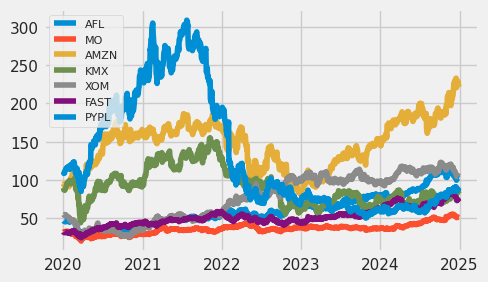

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(5, 3))
plt.plot(df, label=df.columns)
plt.legend(loc='upper left',fontsize=8)
plt.show()

### Log returns of the 7 assets:

In [ ]:
data = np.log(df/df.shift(1))
data.iloc[0] = 0
data.head(5)

,AFL,MO,AMZN,KMX,XOM,FAST,PYPL
Date,,,,,,,
2020-01-02 00:00:00-05:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-03 00:00:00-05:00,-0.006959,0.007686,-0.012213,-0.025458,-0.008072,-0.017887,-0.018132
2020-01-06 00:00:00-05:00,-0.002835,0.004022,0.014776,-0.002409,0.007649,-0.015709,0.012881
2020-01-07 00:00:00-05:00,-0.009510,-0.005232,0.002089,0.002066,-0.008218,-0.001946,-0.004549
2020-01-08 00:00:00-05:00,0.003053,0.010236,-0.007839,-0.001721,-0.015195,0.007486,0.019415


## Now, create annualized covariance and correlation matrices.

### Covariance measures the **directional relationship** between the returns on two assets.

In [ ]:
data.mean()*250
cov_matrix = data.cov() * 250
cov_matrix

,AFL,MO,AMZN,KMX,XOM,FAST,PYPL
AFL,0.102068,0.037258,0.021111,0.070883,0.062965,0.034064,0.040414
MO,0.037258,0.060236,0.011122,0.034851,0.036294,0.024784,0.021218
AMZN,0.021111,0.011122,0.128260,0.051853,0.016684,0.040065,0.084164
KMX,0.070883,0.034851,0.051853,0.206195,0.054546,0.056229,0.078504
XOM,0.062965,0.036294,0.016684,0.054546,0.117266,0.028188,0.033926
FAST,0.034064,0.024784,0.040065,0.056229,0.028188,0.074321,0.052355
PYPL,0.040414,0.021218,0.084164,0.078504,0.033926,0.052355,0.203187


### Correlation measures the **degree** to which two securities move in relation to each other.

In [ ]:
corr_matrix =data.corr() * 250
corr_matrix

,AFL,MO,AMZN,KMX,XOM,FAST,PYPL
AFL,250.000000,118.791541,46.128123,122.150764,143.883305,97.775060,70.158437
MO,118.791541,250.000000,31.633245,78.177899,107.960029,92.603699,47.947448
AMZN,46.128123,31.633245,250.000000,79.713443,34.009129,102.589931,130.338910
KMX,122.150764,78.177899,79.713443,250.000000,87.695708,113.553632,95.883404
XOM,143.883305,107.960029,34.009129,87.695708,250.000000,75.485896,54.945904
FAST,97.775060,92.603699,102.589931,113.553632,75.485896,250.000000,106.510938
PYPL,70.158437,47.947448,130.338910,95.883404,54.945904,106.510938,250.000000


In [ ]:
portfolio1 = data[['AFL','MO']]
portfolio1.corr() * 250
portfolio1.cov() * 250
# portfolio1

,AFL,MO
AFL,0.102068,0.037258
MO,0.037258,0.060236


## Let us assign weights to each investment in the portfolio randomly, and find the variance of this portfolio.

In [ ]:
w = {'AFL': 0.1, 'MO': 0.2, 'AMZN': 0.2, 'KMX': 0.1, 'XOM': 0.2, 'FAST': 0.05, 'PYPL': 0.15}
# sum of all elements in w
sum(w.values())

port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

np.float64(0.052594631534961245)

### To optimize the portfolio, we **cannot assign the weights**. We need exact weights that will maximize expected return for a given risk.

### So, let us get the yearly returns for each company using the package resample.

In [ ]:
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

<ipython-input-29-fbdefa6d49e6>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = df.resample('Y').last().pct_change().mean()


,0
AFL,0.264564
MO,0.162630
AMZN,0.198230
KMX,0.043967
XOM,0.370281
FAST,0.161413
PYPL,-0.140932


### Now, the portfolio returns: individual returns multiplied by weights in the portfolio.

In [ ]:
weights = list(w.values())
port_er = (weights*ind_er).sum()
port_er

np.float64(0.16401239222479674)

## Calculate the volatility, or the annualized standard deviation.

In [ ]:
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

,0
AFL,0.319608
MO,0.245527
AMZN,0.358277
KMX,0.454268
XOM,0.342578
FAST,0.272728
PYPL,0.450942


In [ ]:
data.std()*np.sqrt(250)

,0
AFL,0.319481
MO,0.245430
AMZN,0.358135
KMX,0.454087
XOM,0.342441
FAST,0.272620
PYPL,0.450762


## Create a table for returns and volatility of assets.

In [ ]:
assets = pd.concat([ind_er, ann_sd], axis=1)
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
AFL,0.264564,0.319608
MO,0.162630,0.245527
AMZN,0.198230,0.358277
KMX,0.043967,0.454268
XOM,0.370281,0.342578
FAST,0.161413,0.272728
PYPL,-0.140932,0.450942


In [ ]:
p_ret = []
p_vol = []
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [ ]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its
                                      # weights
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [ ]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [ ]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,AFL weight,MO weight,AMZN weight,KMX weight,XOM weight,FAST weight,PYPL weight
0,0.120783,3.823871,0.061675,0.142080,0.058879,0.156835,0.153200,0.219250,0.208080
1,0.104521,4.196435,0.157449,0.127305,0.128091,0.295103,0.041803,0.078008,0.172241
2,0.130886,3.840852,0.100018,0.101532,0.180508,0.084400,0.156657,0.143966,0.232919
3,0.188629,3.668514,0.066725,0.181841,0.161997,0.016132,0.336393,0.057580,0.179331
4,0.203621,3.397161,0.289179,0.301505,0.313509,0.010858,0.021598,0.054202,0.009150


<Axes: xlabel='Volatility', ylabel='Returns'>

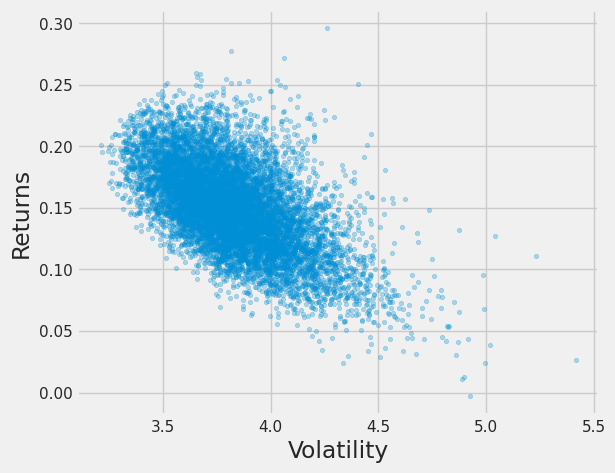

In [ ]:

portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[6,5])